In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import math
import copy
import time

In [33]:
class Sorter():
    def __init__(self, algoirthm, length: int = 100):
        self.lst = [x+1 for x in range(length)]
        random.shuffle(self.lst)
        
        self.stages = algoirthm(self.lst)
        self.animate_plot()
    
    def animate_plot(self):
        fig = plt.figure()
        y = [x for x in range(len(self.lst))]
        bar_plot = plt.bar(y, self.stages[0], width= 1)

        def animate(i):
            data = self.stages[i]
            for k, v in enumerate(bar_plot):
                v.set_height(data[k])

        anim = FuncAnimation(fig, animate, frames=len(self.stages), 
                                       interval=50, blit=False, repeat=False)
        display(HTML(anim.to_jshtml()))

In [11]:
def bubble_sort(lst):
    status = True
    stages = []
    while status:
        status = False
        stages.append(lst.copy())
        #Constant swap of preious element with current one if previous element is a larger value    
        for x in range(1, len(lst)):
            if lst[x-1] > lst[x]:
                status = True
                num1 = lst[x-1]
                num2 = lst[x]

                lst[x-1] = num2
                lst[x] = num1
    return stages

In [12]:
def insertion_sort(lst):
    status = True
    stages = []
    for i in range(len(lst)):
        status = True
        #Same as bubble sort, but sort one new element at a time.    
        while status:
            status = False
            for x in range(1, i+1):
                if lst[x-1] > lst[x]:
                    status = True
                    num1 = lst[x-1]
                    num2 = lst[x]

                    lst[x-1] = num2
                    lst[x] = num1
        stages.append(lst.copy())
    return stages

In [13]:
#Sort groups of elements, merge 2 groups that have the same size and sort them again
def merge_sort(lst):
    status = True
    stages = []
    
    #[total_members,[index_start,index_end]]
    groups = []
    
    status = True
    while status:
        status = False
        #Group merge
        i = None
        
        #Check if one group remains
        if len(groups) == 1:
            if groups[0][1][0] == 0 and groups[0][1][1] == len(lst)-1:
                break
        
        #Check whether to merge 2 groups or create new group
        if len(groups) >=2:
            if groups[-1][1][1] != len(lst)-1:
                
                for x in range(1, len(groups)):
                        if groups[x-1][0] == groups[x][0]:
                            i = x
                            break
            else:
                i = len(groups)-1

        #merge
        if i is not None:
            
            i_start = groups[i-1][1][0]
            i_end = groups[i][1][1]
            new_status = True
            #Do merges
            while new_status:
                new_status = False
                for y in range(i_start+1, i_end+1):
                    if lst[y-1] > lst[y]:
                        new_status = True
                        num1 = lst[y-1]
                        num2 = lst[y]

                        lst[y-1] = num2
                        lst[y] = num1
            #Inser tnew group info            
            total_members = groups[i-1][0]+groups[i][0]
            new_group = [total_members, [i_start,i_end]]
            new_index = i-1
            groups.pop(new_index)
            groups.pop(new_index)
            groups.insert(new_index, new_group)
            status = True
                    
        else:    
        #Intilise first 2 groups
            #Get starting index of group
            if len(groups)==0:
                i = 0
            else:
                i = groups[-1][1][1]+1
            
            #Compare values and swap
            if i+1 <= len(lst)-1:
                if lst[i] > lst[i+1]:
                    num1 = lst[i]
                    num2 = lst[i+1]

                    lst[i] = num2
                    lst[i+1] = num1
                
                groups.append([2,[i,i+1]])
            else:
                groups.append([2,[len(lst)-1,len(lst)-1]])

            status = True
            
        stages.append(lst.copy())
    return stages

In [14]:
#Create a binary tree of the list and sort it by pushing the largest element to the top, swapping the top element with the last element, and repeat
class Tree:
    def __init__(self, lst):
        #Create head node
        self.lst = lst
        self.levels = {}
        #Create head node
        self.head = self.Node(None, self.lst[0], 0)
        self.levels[0] = [self.head]
        
        #completed
        self.completed = []
        
        #create new node
        for x in range(1, len(self.lst)):
            self.create_node(x, self.lst[x])
        
        self.rearrange_lst()
    
    def run(self):
        if len(self.completed)+1 != len(self.lst):
            self.swap_ends()
            self.heapify()
        else:
            self.completed.insert(0, self.head.value)
        
        return self.lst
    
    #Create node and remove value from list
    def create_node(self, position, num):        
        
        node = self.next_position()
        created_node = self.Node(node, num, position)
        
        level = created_node.level
         
        if level in self.levels.keys():
            self.levels[level].append(created_node)
        else:
            self.levels[level] = [created_node]
        
        self.heap_sort(created_node)
    
    def next_position(self):
        
        #Get all levels
        keys = list(self.levels.keys())
        
        #As its a binary tree, each preceding level has double the nodes so checking that (previous level)/(current level) == 2 tells us whether the current level is filled up or not
        if len(keys) > 1:
            #Find out if a level is completed or not
            if len(self.levels[keys[-1]])/2 != len(self.levels[keys[-2]]):
                #Continue level
                index = math.floor(len(self.levels[keys[-1]])/2)
                node = self.levels[keys[-2]][index]
            else:
                #Create new level
                node = self.levels[keys[-1]][0]
        else:
            return self.levels[0][0]
        
        return node
    
    #Sort the tree as it is created
    def heap_sort(self, node):
        current_node = node
        while True:
            if current_node.value > current_node.parent.value:
                self.swap_values(current_node,current_node.parent)
                current_node = current_node.parent
            else:
                break    
    
    def swap_values(self, node1, node2):
        val1 = node1.value
        val2 = node2.value
        
        node1.value = val2
        node2.value = val1
        
    def swap_ends(self):        
        keys = list(self.levels.keys())
        end_node = self.levels[keys[-1]][-1]
        
        self.swap_values(self.head, end_node)
        
        self.remove_node(end_node)
        self.rearrange_lst()
    
    def heapify(self):
        current_node = self.head
        
        while True:
            if len(current_node.children) == 2:

                node = current_node.children[0]
                largest_value = node.value

                for x in current_node.children:
                    if x.value > largest_value:
                        node = x
                        largest_value = x.value

            elif len(current_node.children) == 1:

                largest_value = current_node.children[0].value
                node = current_node.children[0]

            else:
                break

            if current_node.value < largest_value:
                self.swap_values(current_node, node)

                current_node = node
            else:
                break
        
        self.rearrange_lst()
    
    def rearrange_lst(self):
        rearranged = [0 for x in range(len(self.lst)-len(self.completed))]
        for x, y in self.levels.items():
            for z in y:
                rearranged[z.position] = z.value
        
        self.lst = rearranged + self.completed
    
    def remove_node(self, node):
        #Remove from parent
        node.parent.children.remove(node)
        #Remove from levels
        self.levels[node.level].remove(node)
        if len(self.levels[node.level]) == 0:
            self.levels.pop(node.level)
            
        self.completed.insert(0,node.value)
        #delete self
        del node
    
    #Represent node
    class Node:
        
        def __init__(self, node, value, position):
            self.value = value
            self.link_nodes(node)
            self.children = []
            self.position = position
        
        #Add self as child to parent node
        def link_nodes(self, node):
            if node is not None:
                self.parent = node
                node.children.append(self)
                self.level = node.level + 1
            else:
                self.parent = self
                self.level = 0
        
def heap_sort(lst):
    stages = [lst]
    tree = Tree(lst)
    for x in lst:
        stages.append(tree.run())
    
    return stages

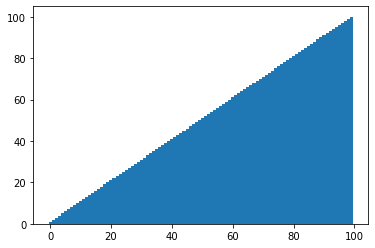

In [37]:
#Visualisation of the alogirthms sorting lists
algorithms = [bubble_sort, insertion_sort, merge_sort, heap_sort]
Sorter(algorithms[3], length=100)